## Import necessary libraries and the dataset

In [134]:
import numpy as np # linear alg.
import pandas as pd # for data processing. CSV file I/O
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection

house = pd.read_csv('./household_power_consumption/energy_consumption_2020.csv',
                    sep=',', index_col=2, parse_dates=True,
                    infer_datetime_format=True, low_memory=False, 
                    na_values=['nan','?'])

house.shape

(496, 14)

(2075259, 7): This represents *rows-496* and *columns-14* that the dataset contains.

Null values:

In [95]:
house.isnull().sum()

site_name                 0
department                0
current_solar             0
electric_utility          0
electricity_usage         0
peak_electric_demand      0
building_type             0
building_area             0
natural_gas_usage         0
energy_use_intensity    216
address                   0
latitude                  7
longitude                 7
location                  7
dtype: int64

Fill the null values with mean values:

In [135]:
house = house.fillna(house.mean())
house.dropna() # drop rows with NaN

C:\Users\Gsr\AppData\Local\Temp\ipykernel_4232\2343268248.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house = house.fillna(house.mean())


,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,
2020-01-01,PHX Building 139,Aviation,0,APS,1,0,REPAIRSERVICES,3616,0,0.000000,2745 E Air Ln,33.44299,-112.02176,POINT(-112.02176 33.44299)
2020-01-01,Old Verde Park Cntr,Parks,0,APS,12,0,UNKNOWN,0,0,83.157536,916 E Van Buren St,33.45205,-112.06179,POINT(-112.06179 33.45205)
2020-01-01,North Ranger Station - Old,Parks,0,APS,77,0,OFFICE,0,0,83.157536,11659 N 16th St,33.59485,-112.04768,POINT(-112.04768 33.59485)
2020-01-01,Lookout Mountain Trailhead,Parks,0,APS,242,0,OUTDOORREC,0,0,83.157536,15415 N 16th St,33.62720,-112.04820,POINT(-112.0482 33.6272)
2020-01-01,Laveen Basin,Parks,0,SRP,317,0,PARK,0,0,83.157536,6039 S 43rd Ave,33.39098,-112.14917,POINT(-112.14917 33.39098)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,PHX Rental Car Center,Aviation,4100,APS,6660320,1834,PARKING,361276,614,58.080000,1795 E Sky Harbor Cir S,33.43014,-112.04510,POINT(-112.0451 33.43014)
2020-01-01,Phoenix City Hall,Public Works,0,APS,10370048,3206,OFFICE,600000,48805,62.420000,200 W Washington St,33.44879,-112.07707,POINT(-112.07707 33.44879)
2020-01-01,PCC North & West Bldgs,Convention,100,APS,14342114,3770,CONVENTION_CN,1766280,297702,42.360000,100 N 3rd St,33.44981,-112.07045,POINT(-112.07045 33.44981)


Now we have a clean dataset to use.



In [136]:
house.tail()

,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,
2020-01-01,Phoenix City Hall,Public Works,0,APS,10370048,3206,OFFICE,600000,48805,62.420000,200 W Washington St,33.448790,-112.077070,POINT(-112.07707 33.44879)
2020-01-01,PHX SkyTrain Switch Yard,Aviation,0,APS,12540154,2189,TRANSPORTATIONTE,0,0,83.157536,333 S 42nd St,33.505784,-112.071781,NaN
2020-01-01,PCC North & West Bldgs,Convention,100,APS,14342114,3770,CONVENTION_CN,1766280,297702,42.360000,100 N 3rd St,33.449810,-112.070450,POINT(-112.07045 33.44981)
2020-01-01,PHX Terminal 3,Aviation,0,APS,22345870,4277,TRANSPORTATIONTE,880000,0,79.760000,3400 E Sky Harbor Blvd,33.435430,-112.008290,POINT(-112.00829 33.43543)
2020-01-01,PHX Terminal 4,Aviation,0,APS,69527895,22957,TRANSPORTATIONTE,1918732,31382,115.450000,3800 E Sky Harbor Blvd,33.435490,-111.997870,POINT(-111.99787 33.43549)


## Data Set Information:

Annual energy consumption across all City-operated facilities.

Source: https://www.phoenixopendata.com/energy-consumption
Last updated at https://www.phoenixopendata.com/ : 2021-07-09


## Attribute Information:

### TABLE COLUMNS
1. site_name
2. department
3. year
4. current_solar
5. electric_utility
6. electricity_usage
7. peak_electric_demand
8. building_type
9. building_area
10. natural_gas_usage
11. energy_use_intensity
12. address
13. latitude
14. longitude
15. location



In [137]:
house.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-01 to 2020-01-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site_name             496 non-null    object 
 1   department            496 non-null    object 
 2   current_solar         496 non-null    int64  
 3   electric_utility      496 non-null    object 
 4   electricity_usage     496 non-null    int64  
 5   peak_electric_demand  496 non-null    int64  
 6   building_type         496 non-null    object 
 7   building_area         496 non-null    int64  
 8   natural_gas_usage     496 non-null    int64  
 9   energy_use_intensity  496 non-null    float64
 10  address               496 non-null    object 
 11  latitude              496 non-null    float64
 12  longitude             496 non-null    float64
 13  location              489 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 58.1+ 

In [138]:
house.describe()

,current_solar,electricity_usage,peak_electric_demand,building_area,natural_gas_usage,energy_use_intensity,latitude,longitude
count,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000
mean,18.570565,5.360974e+05,194.112903,2.769305e+04,1785.520161,83.157536,33.505784,-112.071781
std,201.573224,3.454466e+06,1115.499161,1.374057e+05,15412.935269,148.618688,0.100829,0.060911
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,33.291660,-112.288850
25%,0.000000,2.823350e+04,0.000000,0.000000e+00,0.000000,41.612500,33.438800,-112.107360
50%,0.000000,8.811800e+04,38.000000,3.743500e+03,0.000000,83.157536,33.472845,-112.071781
75%,0.000000,2.138845e+05,104.500000,1.357475e+04,113.250000,83.157536,33.581833,-112.029495
max,4100.000000,6.952790e+07,22957.000000,1.918732e+06,297702.000000,2055.030000,33.806080,-111.746200


In [139]:
house.isnull().sum()

site_name               0
department              0
current_solar           0
electric_utility        0
electricity_usage       0
peak_electric_demand    0
building_type           0
building_area           0
natural_gas_usage       0
energy_use_intensity    0
address                 0
latitude                0
longitude               0
location                7
dtype: int64

There are almost no null values left after filling with mean values.

## Visualize the Data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


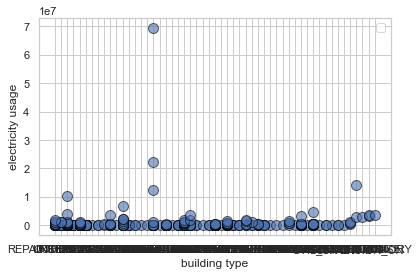

In [140]:
btype = house['building_type']
electricity = house['electricity_usage']

plt.scatter(btype, electricity, s=100, alpha=0.6, edgecolor='black', linewidth=1)
plt.xlabel('building type')
plt.ylabel('electricity usage')

plt.tight_layout()
plt.legend()
plt.show()

Because 'building_type' column has categorical building type names, it doesn't fit in the graph for visualisation by plt. So we need to transform them to numerical:

In [ ]:
# convert column "building_type" and "b" to numeric
house[["building_type"]] = house[["building_type"]].apply(pd.to_numeric)

### Transforming building names to numbers
The above code gives error because it cannot parse strings to numbers; we need to use numbers. We are **transforming building names to numbers** by using sklearn library:

In [142]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
house['building_type'] = lab_encoder.fit_transform(house['building_type'])

In [143]:
house.head(10)

,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,
2020-01-01,PHX Building 139,Aviation,0,APS,1,0,37,3616,0,0.000000,2745 E Air Ln,33.44299,-112.02176,POINT(-112.02176 33.44299)
2020-01-01,Old Verde Park Cntr,Parks,0,APS,12,0,47,0,0,83.157536,916 E Van Buren St,33.45205,-112.06179,POINT(-112.06179 33.45205)
2020-01-01,North Ranger Station - Old,Parks,0,APS,77,0,22,0,0,83.157536,11659 N 16th St,33.59485,-112.04768,POINT(-112.04768 33.59485)
2020-01-01,Lookout Mountain Trailhead,Parks,0,APS,242,0,29,0,0,83.157536,15415 N 16th St,33.62720,-112.04820,POINT(-112.0482 33.6272)
2020-01-01,Laveen Basin,Parks,0,SRP,317,0,33,0,0,83.157536,6039 S 43rd Ave,33.39098,-112.14917,POINT(-112.14917 33.39098)
2020-01-01,Tawa Mini Park,Parks,0,SRP,489,0,33,0,0,83.157536,4540 N 11th Ave,33.50389,-112.08718,POINT(-112.08718 33.50389)
2020-01-01,Ho-E Mini Park,Parks,0,SRP,552,0,33,0,0,83.157536,128 W Illini St,33.41183,-112.07694,POINT(-112.07694 33.41183)
2020-01-01,PHX Hangar 1,Aviation,0,APS,671,0,13,0,0,83.157536,2435 E Air Ln,33.44370,-112.02926,POINT(-112.02926 33.4437)
2020-01-01,Kierland Park,Parks,0,APS,749,0,33,0,0,83.157536,15800 N 66th St,33.63164,-111.94024,POINT(-111.94024 33.63164)


## Visualize Data (continue)

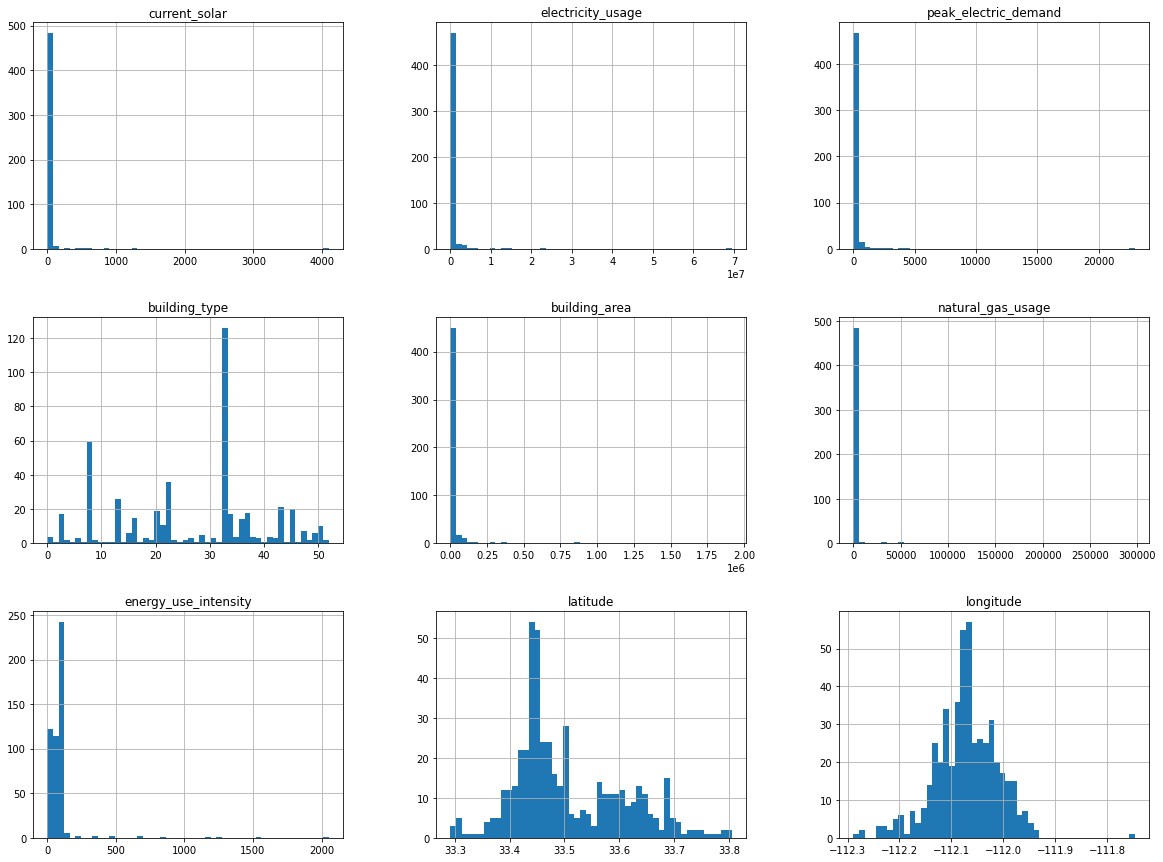

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

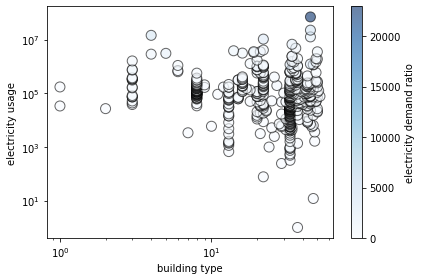

In [62]:
btype = house['building_type']
electricity = house['electricity_usage']
gas = house['natural_gas_usage']
energy = house['energy_use_intensity']
peak_electric = house['peak_electric_demand']

plt.scatter(btype, electricity, c=peak_electric, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('electricity demand ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('building type')
plt.ylabel('electricity usage')

plt.tight_layout()
plt.show()

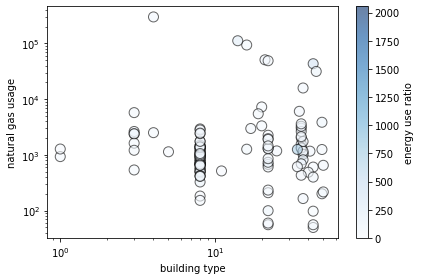

In [63]:
btype = house['building_type']
gas = house['natural_gas_usage']
energy = house['energy_use_intensity']
peak_electric = house['peak_electric_demand']

plt.scatter(btype, gas, c=energy, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('energy use ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('building type')
plt.ylabel('natural gas usage')

plt.tight_layout()
plt.show()

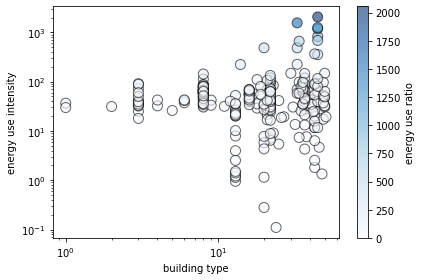

In [67]:
btype = house['building_type']
energy = house['energy_use_intensity']

plt.scatter(btype, energy, c=energy, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('energy use ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('building type')
plt.ylabel('energy use intensity')

plt.tight_layout()
plt.show()

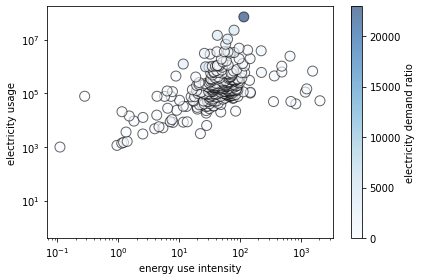

In [70]:
btype = house['building_type']
electricity = house['electricity_usage']
gas = house['natural_gas_usage']
energy = house['energy_use_intensity']
peak_electric = house['peak_electric_demand']

plt.scatter(energy, electricity, c=peak_electric, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('electricity demand ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy use intensity')
plt.ylabel('electricity usage')

plt.tight_layout()
plt.show()

As seen in the scatter plot above, we can observe that there seems to be a linear trend in data; as the energy use intensity increases, electricity usage also increases.

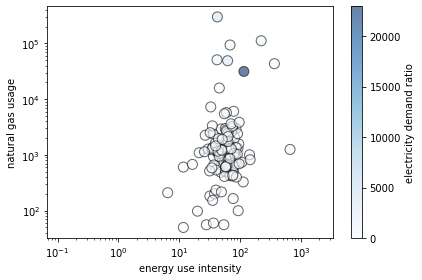

In [73]:
btype = house['building_type']
electricity = house['electricity_usage']
gas = house['natural_gas_usage']
energy = house['energy_use_intensity']
peak_electric = house['peak_electric_demand']

plt.scatter(energy, gas, c=peak_electric, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('electricity demand ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy use intensity')
plt.ylabel('natural gas usage')

plt.tight_layout()
plt.show()

As seen in the scatter plot above, we can observe that there seems to be a slightly linear trend in data; as the energy use intensity increases, natural gas usage also increases.

## Making heatmap of corelations

In [114]:
house.head()

,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,
2020-01-01,PHX Building 139,Aviation,0,APS,1,0,37,3616,0,0.000000,2745 E Air Ln,33.44299,-112.02176,POINT(-112.02176 33.44299)
2020-01-01,Old Verde Park Cntr,Parks,0,APS,12,0,47,0,0,83.157536,916 E Van Buren St,33.45205,-112.06179,POINT(-112.06179 33.45205)
2020-01-01,North Ranger Station - Old,Parks,0,APS,77,0,22,0,0,83.157536,11659 N 16th St,33.59485,-112.04768,POINT(-112.04768 33.59485)
2020-01-01,Lookout Mountain Trailhead,Parks,0,APS,242,0,29,0,0,83.157536,15415 N 16th St,33.62720,-112.04820,POINT(-112.0482 33.6272)
2020-01-01,Laveen Basin,Parks,0,SRP,317,0,33,0,0,83.157536,6039 S 43rd Ave,33.39098,-112.14917,POINT(-112.14917 33.39098)


In [106]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


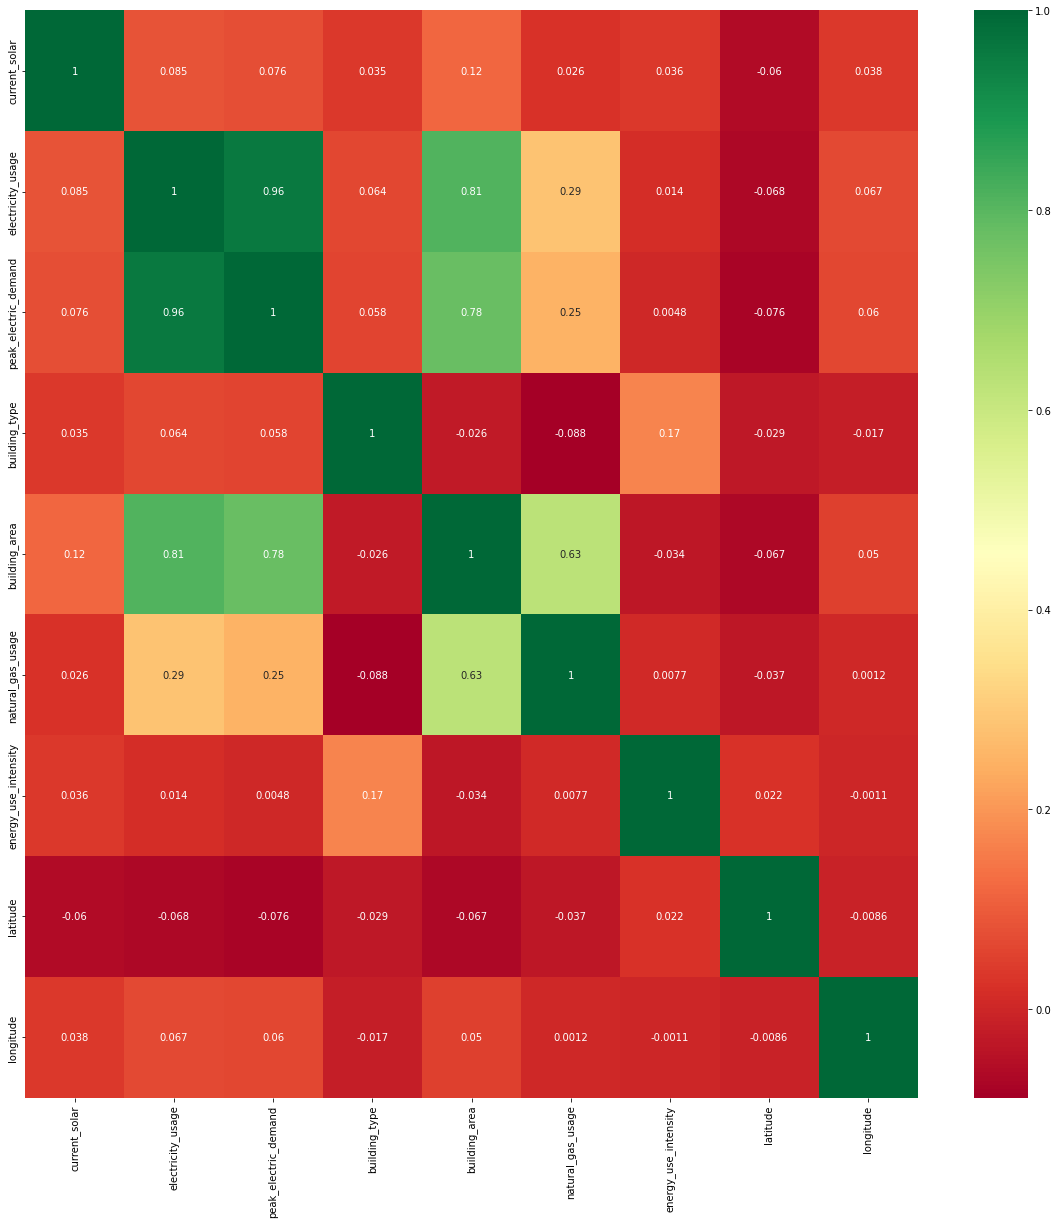

In [113]:
corrmap = house.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))

house_heatmap = sns.heatmap(house[top_corr_features].corr(), annot=True, cmap="RdYlGn")

According to the heatmap above; there are items which are either **positively** or **negatively** correlated. 

Let's sort the data by electricity usage to identify outliers by sorting them in descending order (highest top):

In [146]:
sorted_electricity = house.sort_values('electricity_usage', ascending=False)
sorted_electricity.head()

,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,
2020-01-01,PHX Terminal 4,Aviation,0,APS,69527895,22957,45,1918732,31382,115.450000,3800 E Sky Harbor Blvd,33.435490,-111.997870,POINT(-111.99787 33.43549)
2020-01-01,PHX Terminal 3,Aviation,0,APS,22345870,4277,45,880000,0,79.760000,3400 E Sky Harbor Blvd,33.435430,-112.008290,POINT(-112.00829 33.43543)
2020-01-01,PCC North & West Bldgs,Convention,100,APS,14342114,3770,4,1766280,297702,42.360000,100 N 3rd St,33.449810,-112.070450,POINT(-112.07045 33.44981)
2020-01-01,PHX SkyTrain Switch Yard,Aviation,0,APS,12540154,2189,45,0,0,83.157536,333 S 42nd St,33.505784,-112.071781,NaN
2020-01-01,Phoenix City Hall,Public Works,0,APS,10370048,3206,22,600000,48805,62.420000,200 W Washington St,33.448790,-112.077070,POINT(-112.07707 33.44879)


In [148]:
len(sorted_electricity.head(len(sorted_electricity)//250))

1

In [149]:
sorted_electricity.electricity_usage[len(sorted_electricity.head(len(sorted_electricity)//250))]

22345870

Only the values above this value will be considered outliers.

C:\Users\Gsr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


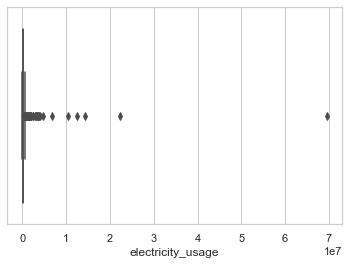

In [150]:
# boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_electricity.electricity_usage)

We are gonna drop outliers:

In [151]:
house = house.dropna()
house = house.drop(house[(house.electricity_usage>22345870)|(house.electricity_usage<0)].index)

In [152]:
sorted_electricity = house.sort_values('electricity_usage', ascending=False)
house.head()

,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,


When I drop the outliers, somehow I empty the dataset, so considering that our dataset is too small, we skip dropping the outliers until we got a larger dataset.

In [154]:
sorted_electricity = house.sort_values('electricity_usage', ascending=False)
sorted_electricity.head()

,site_name,department,current_solar,electric_utility,electricity_usage,peak_electric_demand,building_type,building_area,natural_gas_usage,energy_use_intensity,address,latitude,longitude,location
year,,,,,,,,,,,,,,
2020-01-01,PHX Terminal 4,Aviation,0,APS,69527895,22957,45,1918732,31382,115.450000,3800 E Sky Harbor Blvd,33.435490,-111.997870,POINT(-111.99787 33.43549)
2020-01-01,PHX Terminal 3,Aviation,0,APS,22345870,4277,45,880000,0,79.760000,3400 E Sky Harbor Blvd,33.435430,-112.008290,POINT(-112.00829 33.43543)
2020-01-01,PCC North & West Bldgs,Convention,100,APS,14342114,3770,4,1766280,297702,42.360000,100 N 3rd St,33.449810,-112.070450,POINT(-112.07045 33.44981)
2020-01-01,PHX SkyTrain Switch Yard,Aviation,0,APS,12540154,2189,45,0,0,83.157536,333 S 42nd St,33.505784,-112.071781,NaN
2020-01-01,Phoenix City Hall,Public Works,0,APS,10370048,3206,22,600000,48805,62.420000,200 W Washington St,33.448790,-112.077070,POINT(-112.07707 33.44879)


## Visualize Based on the Heatmap

C:\Users\Gsr\AppData\Local\Temp\ipykernel_4232\1170944921.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


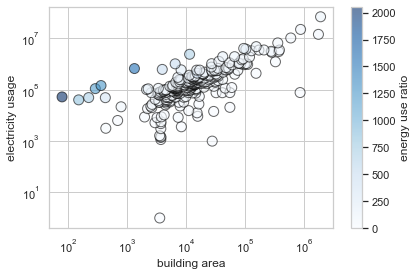

In [158]:
barea = house['building_area']
energy = house['energy_use_intensity']
electricity = house['electricity_usage']

plt.scatter(barea, electricity, c=energy, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('energy use ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('building area')
plt.ylabel('electricity usage')

plt.tight_layout()
plt.show()

C:\Users\Gsr\AppData\Local\Temp\ipykernel_4232\3985389901.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


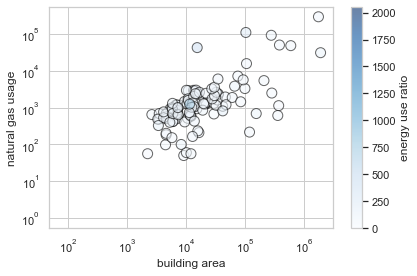

In [159]:
barea = house['building_area']
energy = house['energy_use_intensity']
gas = house['natural_gas_usage']

plt.scatter(barea, gas, c=energy, cmap="Blues", s=100, alpha=0.6, edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('energy use ratio')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('building area')
plt.ylabel('natural gas usage')

plt.tight_layout()
plt.show()

Looking the recent scatter plots; there seems to be a powerful **linear trend** in data; as the building area increases, electricity usage and natural gas usage also increases.

## Compare the importance of different features
Given a dataset, not all the columns might be helpful for training a machine learning model. Even if they are, it is good to check which features are most impactful to our model. In business environments, explainability is always crucial when proposing business insights. As we know, the coefficients of an linear regression model denote the importance of each feature column. So we already have the information! We only need to display it intuitively. 

A histogram to compare the importance of different features:

transforming names to numbers;

In [171]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
house['site_name'] = lab_encoder.fit_transform(house['site_name'])
house['department'] = lab_encoder.fit_transform(house['department'])
house['electric_utility'] = lab_encoder.fit_transform(house['electric_utility'])
house['address'] = lab_encoder.fit_transform(house['address'])
house['location'] = lab_encoder.fit_transform(house['location'])

(396, 13) (100, 13)
(396,) (100,)


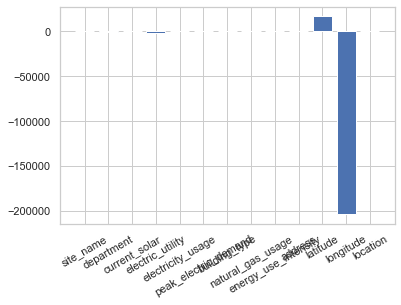

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = house.drop('building_area', axis=1)
y = house['building_area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

model = LinearRegression()
model = model.fit(X_train, y_train)

importance = model.coef_

#histogram
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

##  Fit Linear Regression model by using Linear Regression class

In [180]:
house.head()
from sklearn.linear_model import LinearRegression

house_data = house

X = pd.DataFrame(np.c_[house_data['natural_gas_usage'], house_data['building_area']], columns = ['natural_gas_usage', 'building_area'])
y = house_data['electricity_usage']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#fit the model
house_model = LinearRegression()
house_model.fit(X_train, y_train)

(396, 2) (100, 2)
(396,) (100,)


LinearRegression()

We have trained it.
We can check how well the model performs.



In [181]:
y_test_predict = house_model.predict(X_test)


We can use the concept of *residuals* to create a residual plot using the house_model Linear Regression model. Since residuals are simply (y_test-y_test_pred), we can plot these differences against y_test_pred and see how far off these points lie in the plane.

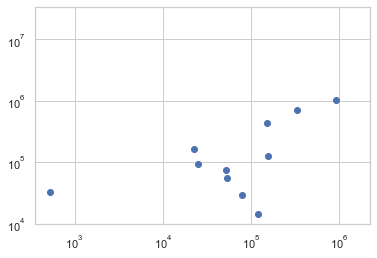

In [185]:
import matplotlib.pyplot as plt
plt.scatter(y_test-y_test_predict,y_test_predict)

plt.xscale('log')
plt.yscale('log')
plt.show()

Linear regression does not seem to work pretty well. That is maybe because there are too less data to train the model. 

In real life, we can only have predictions with some probability of being true. The confidence interval defines a value x such that there is an x% probability of a value lying within this interval to be true. Or, for a given sample, there is an x% probability that its true value lies within the interval.

we can use seaborn to fit a linear regression model and plot the interval:

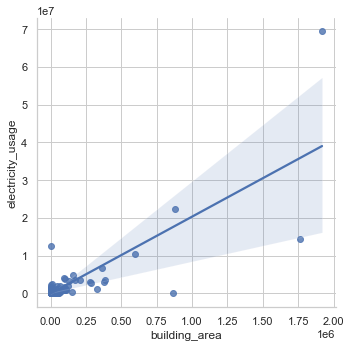

In [203]:
import seaborn as sns
import pandas as pd

##frame = pd.DataFrame(np.c_[X_test[:100], y_test[:100]], columns = ['x','y'])
sns.lmplot(x='building_area', y='electricity_usage', data=house_data, fit_reg=True, ci=85)


The above code plot the data points and an 85% confidence interval. From the figure we can see that very few data points lie in this region given the simplicity of the linear regression model.



Our observation from the plot is that: A complex model would work better for this data.

## Fit a linear regression model for a unique variable (in sklearn)

C:\Users\Gsr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


[322.83333981] 509251.41453129705


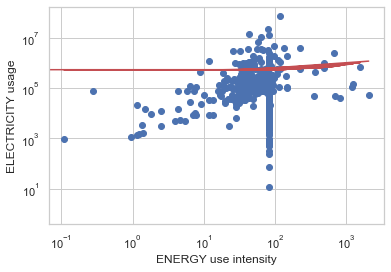

In [205]:


### Fitting the model
house_mdl = linear_model.LinearRegression(normalize=True)
en = np.expand_dims(energy, 1)
el = electricity
house_mdl.fit(en, el)

a0 = house_mdl.coef_
a1 = house_mdl.intercept_
print(a0, a1)

plt.scatter(energy, electricity)
en = energy     ## x value of the linear equation 
el = a0*en + a1 ## y value of the linear equation y = a0*x + a1
plt.plot(en, el, 'r')
plt.xlabel('ENERGY use intensity')
plt.ylabel('ELECTRICITY usage')

plt.xscale('log')
plt.yscale('log')
plt.show()

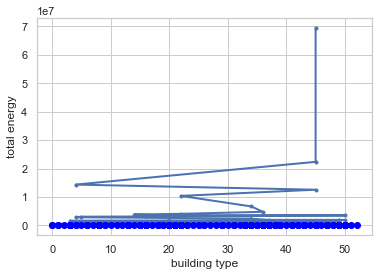

In [207]:
btype = house['building_type']
electricity = house['electricity_usage']
gas = house['natural_gas_usage']
energy = house['energy_use_intensity']

plt.plot(btype, electricity, '.-b', label="electricity usage", linewidth=2)
plt.plot(btype, gas, color='blue', label="gas usage", linewidth=3, linestyle='--', marker='o')

plt.xlabel('building type')
plt.ylabel('total energy')

plt.show()

## Results:
- The data set information given was so limited that limited us to presume many things about the columns such as their data type (kW/h etc.)
- As a result of the observations; a complex model would work better for this data. But it might be worth the try the algorithm with the data that is gonna be created or bigger dataset to check.